In [2]:
#농어의 길이와 무게 데이터
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

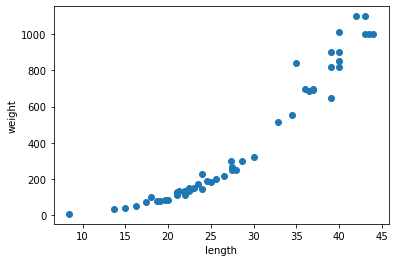

In [4]:
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

In [17]:
train_input, test_input, train_target,test_target = train_test_split(perch_length,perch_weight,random_state = 42)

In [8]:
train_input.shape

(42,)

In [18]:
#reshape는 넘파이에서 배열의 크기를 변경시켜줌 사이킷런에서 사용할 훈련세트는 2차원 배열이어야하기때문에 
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
train_input.shape, test_input.shape

((42, 1), (14, 1))

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
knr = KNeighborsRegressor()

In [19]:
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [20]:
knr.score(test_input,test_target)
#결정계수 

0.992809406101064

In [21]:
#타깃값과 예측값의 절댓값 오차를 평균하여 반환 
from sklearn.metrics import mean_absolute_error

In [22]:
test_prediction = knr.predict(test_input)

In [23]:
tmp = mean_absolute_error(test_target,test_prediction)
tmp

19.157142857142862

In [24]:
knr.score(train_input,train_target)
#왜 훈련데이터로 점수냈을때 더 낮은가 (과소적합) 이웃의 갯수를 줄이자

0.9698823289099254

In [25]:
knr.n_neighbors = 3

In [26]:
knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

In [27]:
knr.score(train_input,train_target), knr.score(test_input,test_target)
#이웃의 갯수 3개로 조절 

(0.9804899950518966, 0.9746459963987609)

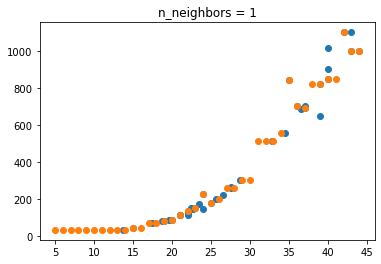

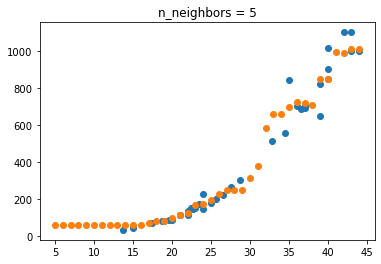

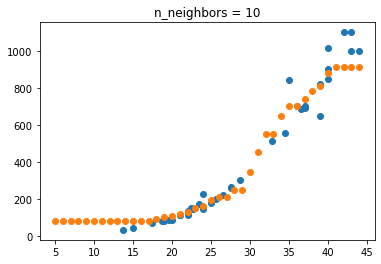

In [34]:

x = np.arange(5,45).reshape(-1,1)
for i in [1,5,10]:
    knr.n_neighbors = i
    knr.fit(train_input,train_target)
    prediction = knr.predict(x)
    plt.scatter(train_input,train_target)
    plt.scatter(x,prediction)
    plt.title('n_neighbors = {}'.format(i))
    plt.show()
#이웃의 갯수가 늘수록 단순해진다    